In [0]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [0]:
df = pd.read_csv('creditcard.csv')

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 284807 rows and 31 columns.


In [4]:
#peek at data
df.sample(5)

Time        V1        V2  ...       V28  Amount  Class
85485    60789.0  1.285547 -0.608159  ...  0.001774   49.99      0
225265  144178.0  1.940187 -0.117461  ... -0.022640   62.71      0
64532    51186.0  1.481849 -0.232306  ... -0.000825   15.00      0
32501    36828.0  1.339042  0.634646  ...  0.029815    0.76      0
204697  135397.0  1.893277  0.299036  ... -0.041419    0.00      0

[5 rows x 31 columns]

In [5]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [6]:
#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

Time      Amount
count  284807.000  284807.000
mean    94813.860      88.350
std     47488.146     250.120
min         0.000       0.000
25%     54201.500       5.600
50%     84692.000      22.000
75%    139320.500      77.165
max    172792.000   25691.160

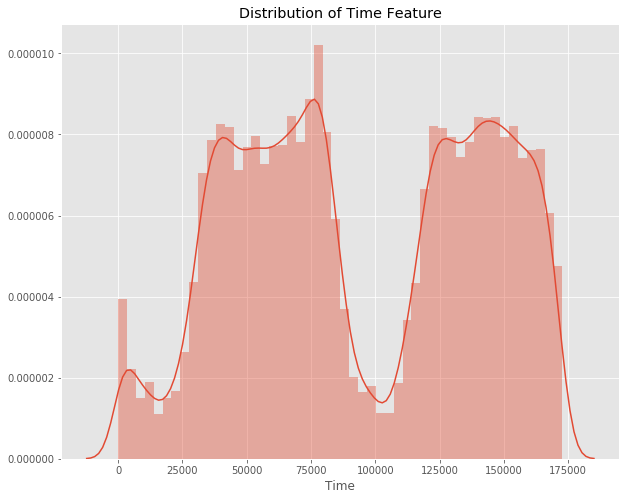

In [7]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

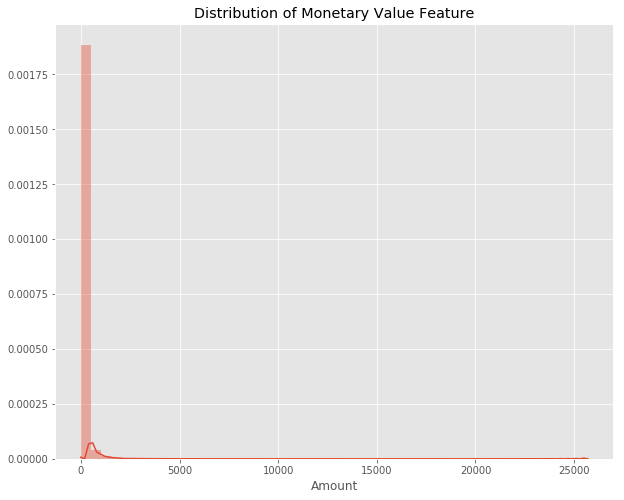

In [8]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

Around 88 dollars is the mean of all credit card transactions in this data set. The biggest transaction had a monetary value of around 25,691 dollars.

In [9]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 284315 non-fraudulent transactions (99.827%) and 492 fraudulent transactions (0.173%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

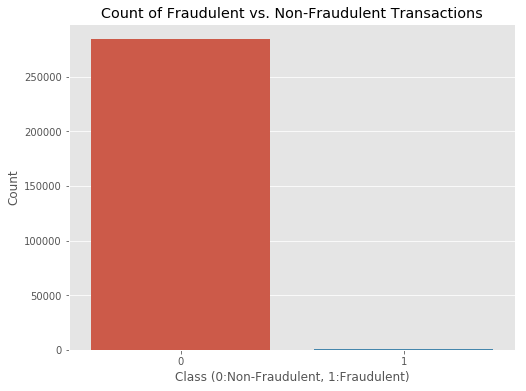

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [11]:
corr = df.corr()
corr

Time         V1         V2  ...        V28     Amount      Class
Time    1.000  1.174e-01 -1.059e-02  ... -9.413e-03 -1.060e-02 -1.232e-02
V1      0.117  1.000e+00  4.697e-17  ...  9.821e-16 -2.277e-01 -1.013e-01
V2     -0.011  4.697e-17  1.000e+00  ... -3.676e-16 -5.314e-01  9.129e-02
V3     -0.420 -1.424e-15  2.512e-16  ...  7.727e-16 -2.109e-01 -1.930e-01
V4     -0.105  1.755e-17 -1.126e-16  ... -5.864e-17  9.873e-02  1.334e-01
V5      0.173  6.391e-17 -2.040e-16  ... -3.299e-16 -3.864e-01 -9.497e-02
V6     -0.063  2.398e-16  5.025e-16  ...  4.813e-16  2.160e-01 -4.364e-02
V7      0.085  1.992e-15  3.966e-16  ... -6.837e-17  3.973e-01 -1.873e-01
V8     -0.037 -9.491e-17 -4.414e-17  ... -4.484e-16 -1.031e-01  1.988e-02
V9     -0.009  2.170e-16 -5.729e-17  ...  9.147e-16 -4.425e-02 -9.773e-02
V10     0.031  7.434e-17 -4.782e-16  ... -1.516e-16 -1.015e-01 -2.169e-01
V11    -0.248  2.439e-16  9.469e-16  ... -3.092e-16  1.040e-04  1.549e-01
V12     0.124  2.422e-16 -6.588e-16  ...  7.327e-16 -9.542e-03 -2.606e-01
V13    -0.066 -2.115e-16  3.855e-16  ...  1.050e-15  5.293e-03 -4.570e-03
V14    -0.099  9.353e-16 -2.541e-16  ...  2.503e-15  3.375e-02 -3.025e-01
V15    -0.183 -3.252e-16  2.831e-16  ... -1.063e-15 -2.986e-03 -4.223e-03
V16     0.012  6.309e-16  4.934e-17  ...  8.637e-16 -3.910e-03 -1.965e-01
V17    -0.073 -5.012e-16 -9.883e-16  ... -2.183e-16  7.309e-03 -3.265e-01
V18     0.090  2.870e-16  2.637e-16  ...  8.845e-16  3.565e-02 -1.115e-01
V19     0.029  1.818e-16  9.528e-17  ... -1.376e-15 -5.615e-02  3.478e-02
V20    -0.051  1.037e-16 -9.310e-16  ... -1.134e-16  3.394e-01  2.009e-02
V21     0.045 -1.755e-16  8.444e-17  ...  5.132e-16  1.060e-01  4.041e-02
V22     0.144  7.477e-17  2.501e-16  ... -3.021e-16 -6.480e-02  8.053e-04
V23     0.051  9.809e-16  1.060e-16  ...  9.030e-16 -1.126e-01 -2.685e-03
V24    -0.016  7.354e-17 -8.142e-18  ... -2.259e-16  5.146e-03 -7.221e-03
V25    -0.233 -9.805e-16 -4.262e-17  ...  3.399e-16 -4.784e-02  3.308e-03
V26    -0.041 -8.622e-17  2.602e-16  ... -3.751e-16 -3.208e-03  4.455e-03
V27    -0.005  3.208e-17 -4.478e-16  ... -3.770e-16  2.883e-02  1.758e-02
V28    -0.009  9.821e-16 -3.676e-16  ...  1.000e+00  1.026e-02  9.536e-03
Amount -0.011 -2.277e-01 -5.314e-01  ...  1.026e-02  1.000e+00  5.632e-03
Class  -0.012 -1.013e-01  9.129e-02  ...  9.536e-03  5.632e-03  1.000e+00

[31 rows x 31 columns]

Text(0.5, 1.0, 'Heatmap of Correlation')

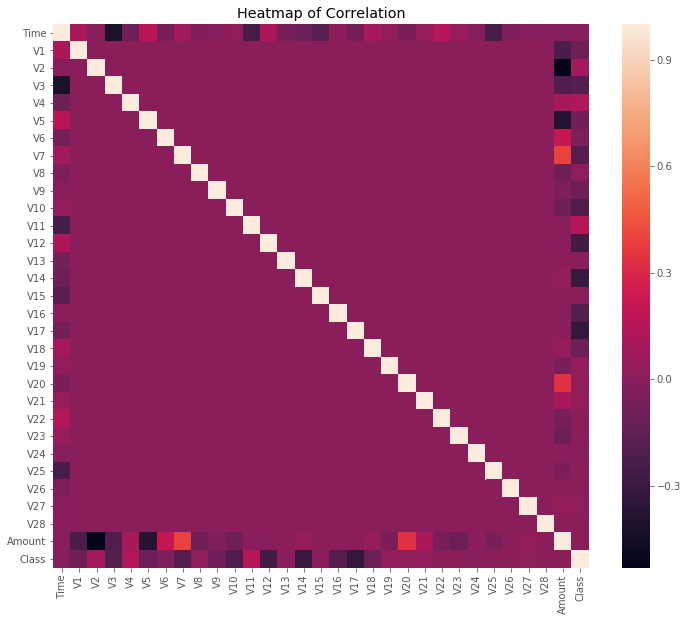

In [12]:
#heatmap
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

Time      -0.036
V1        -3.281
V2        -4.625
V3        -2.240
V4         0.676
V5        -2.426
V6         1.827
V7         2.554
V8        -8.522
V9         0.555
V10        1.187
V11        0.357
V12       -2.278
V13        0.065
V14       -1.995
V15       -0.308
V16       -1.101
V17       -3.845
V18       -0.260
V19        0.109
V20       -2.037
V21        3.593
V22       -0.213
V23       -5.875
V24       -0.552
V25       -0.416
V26        0.577
V27       -1.170
V28       11.192
Amount    16.978
Class     23.998
dtype: float64

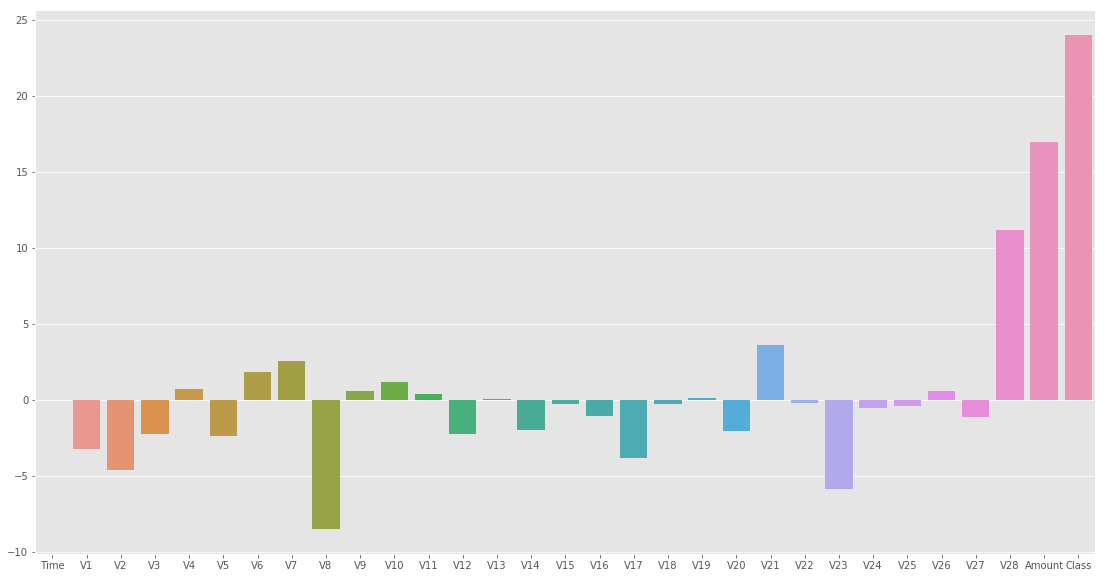

In [13]:
#skewness
skew_ = df.skew()
plt.figure(figsize=(19,10))
sns.barplot(x=skew_.index,y=skew_)
skew_

**Scaling Amount and Time**

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [0]:
#scaling the amount column
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [16]:
#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

Time     V1     V2  ...  Class  scaled_amount  scaled_time
264458  161437.0  0.056  0.531  ...      0         -0.245        1.403
169023  119490.0  1.761 -0.642  ...      0          0.178        0.520
59775    48997.0 -1.722  0.705  ...      0         -0.064       -0.965
280693  169689.0 -0.296  0.767  ...      0         -0.350        1.577
29230    35372.0 -2.069 -2.153  ...      0         -0.313       -1.252

[5 rows x 33 columns]

In [0]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

**Splitting Data into Train and Test**

In [18]:
#manual train test split using numpy's random.rand
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (256391, 31)
Test Shape: (28416, 31)


In [0]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

**Creating a subsample data set with balanced class distributions**

In [20]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 435 fraudulent transactions in the train data.


In [0]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [22]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

V1     V2     V3     V4  ...    V28  Class  scaled_amount  scaled_time
88301  -2.374  0.928  1.106  1.147  ... -0.324      0         -0.137       -0.596
83623   1.259  0.451  0.334  0.680  ...  0.033      0         -0.350       -0.646
168085 -0.479  0.929 -1.347 -1.990  ... -0.481      0         -0.350        0.683
74792  -1.174  0.880  1.244  1.373  ... -0.063      0         -0.206       -0.740
177572  1.974 -0.430 -0.229  0.538  ... -0.037      0         -0.313        0.782

[5 rows x 31 columns]

In [0]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [24]:
subsample = pd.concat([selected, fraud])
len(subsample)

870

In [25]:
#shuffling our data set
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

V1      V2      V3     V4  ...    V28  Class  scaled_amount  scaled_time
0   0.842  -0.366  -2.464  4.821  ...  0.104      1          1.932        0.003
1  -1.048   1.300  -0.180  2.590  ...  0.070      1         -0.196       -1.121
2   1.024   2.001  -4.770  3.819  ...  0.020      1         -0.349       -1.834
3  -1.064   1.128   1.284  1.089  ...  0.193      0         -0.194       -0.311
4  -6.352  -2.370  -4.875  2.335  ... -0.651      1          0.429        0.979
5  -0.493   0.479   0.627 -0.565  ... -0.073      0         -0.218        1.139
6 -18.475  11.586 -21.403  6.039  ...  0.482      1          0.047       -1.438
7  -2.620   1.098  -0.465 -0.262  ... -0.364      0         -0.052        1.123
8  -0.952   0.523   1.722  0.040  ...  0.134      0         -0.277       -0.927
9   1.027  -0.767   0.442 -1.317  ...  0.020      0          0.011       -0.878

[10 rows x 31 columns]

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

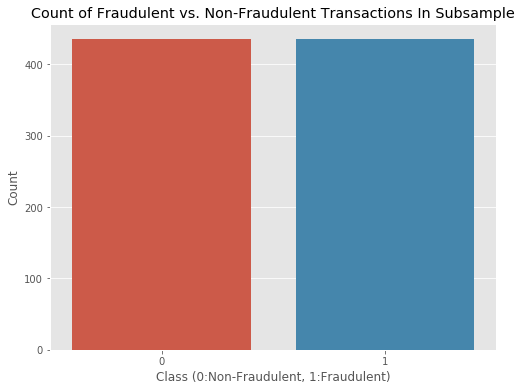

In [26]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [27]:
#taking a look at correlations once more
corr = subsample.corr()
corr = corr[['Class']]
corr

Class
V1            -0.420
V2             0.481
V3            -0.570
V4             0.704
V5            -0.371
V6            -0.391
V7            -0.478
V8             0.047
V9            -0.566
V10           -0.622
V11            0.680
V12           -0.679
V13           -0.031
V14           -0.749
V15           -0.042
V16           -0.591
V17           -0.561
V18           -0.479
V19            0.258
V20            0.185
V21            0.131
V22            0.046
V23            0.006
V24           -0.110
V25            0.008
V26            0.012
V27            0.110
V28            0.045
Class          1.000
scaled_amount  0.089
scaled_time   -0.102

In [28]:
#negative correlations smaller than -0.5
corr[corr.Class < -0.5]

Class
V3  -0.570
V9  -0.566
V10 -0.622
V12 -0.679
V14 -0.749
V16 -0.591
V17 -0.561

In [29]:
#positive correlations greater than 0.5
corr[corr.Class > 0.5]

Class
V4     0.704
V11    0.680
Class  1.000

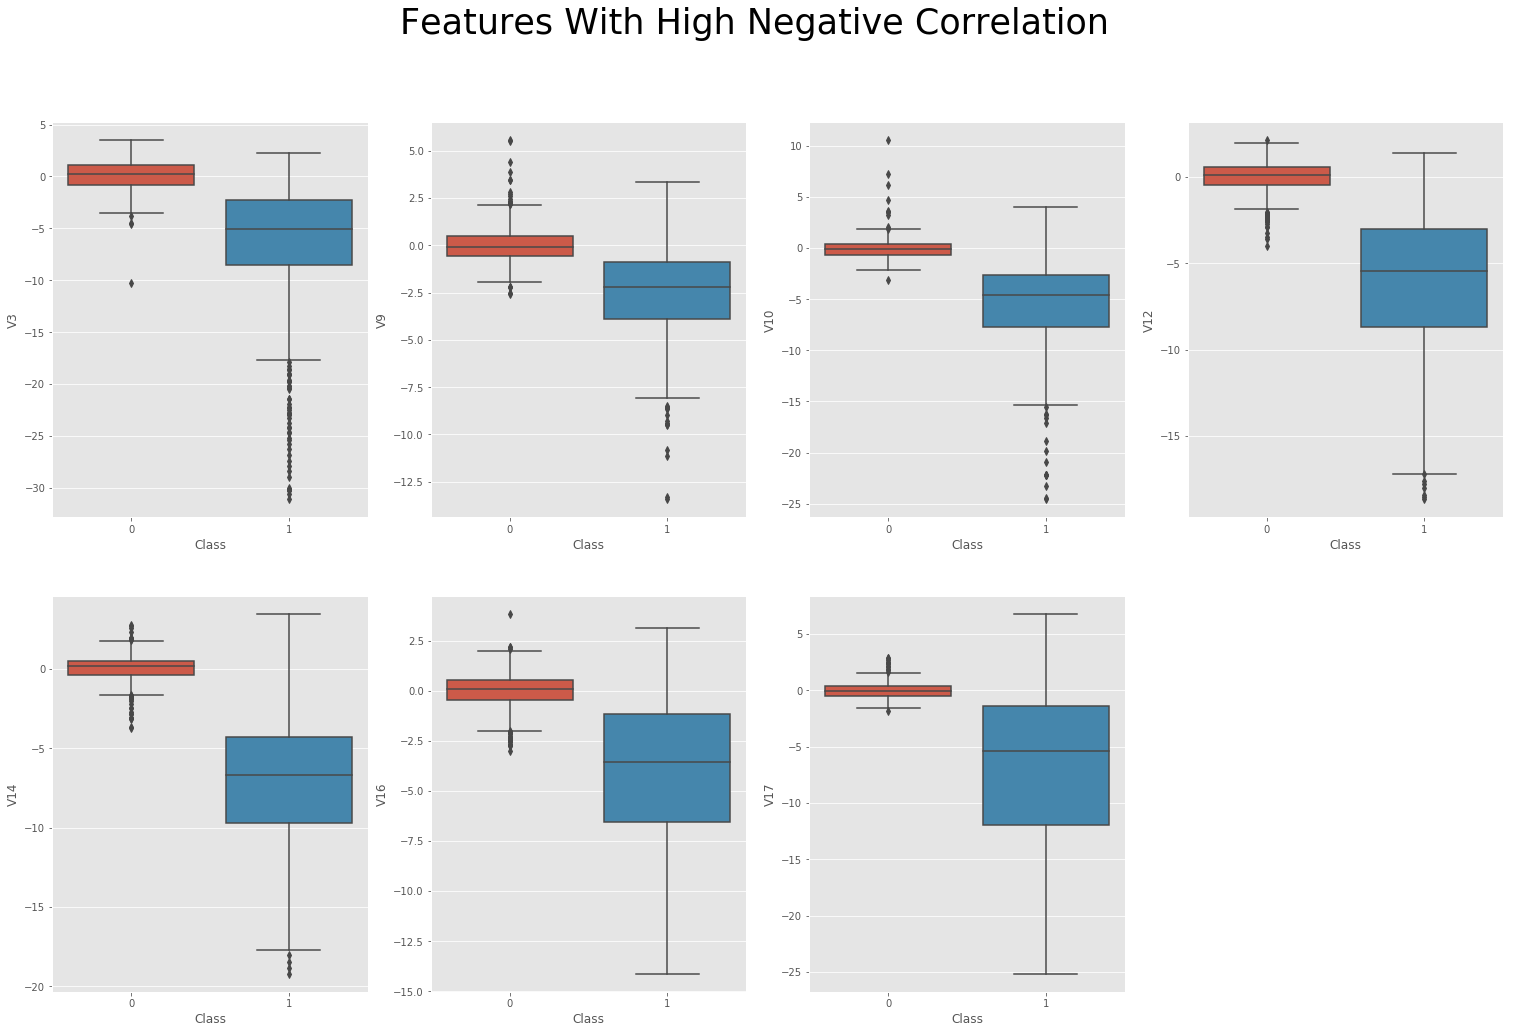

In [30]:
#visualizing the features w high negative correlation
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

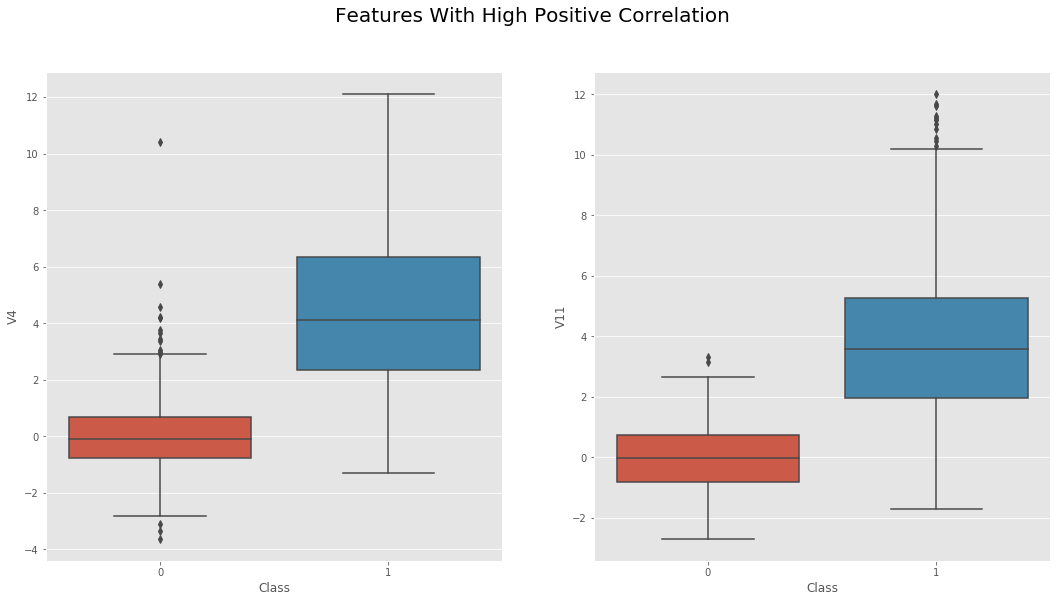

In [31]:
#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

**Extreme Outlier Removal**

In [0]:
#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [33]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 870 transactions by 262 transactions to 608 transactions.


**Dimensionality Reduction**

In [0]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [0]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

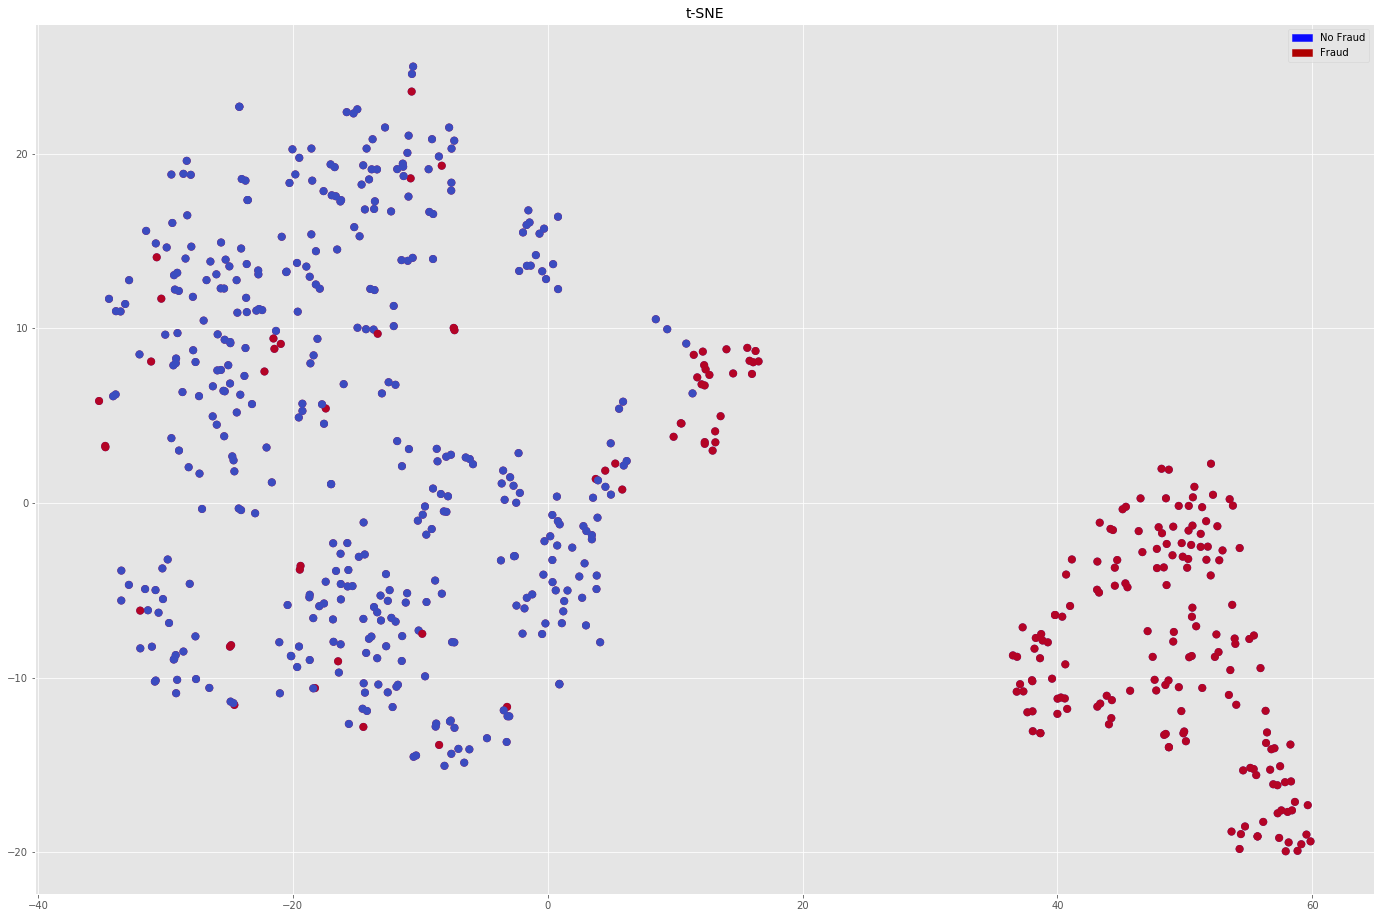

In [36]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])


**Classification Algorithms**

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [0]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [40]:
print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (486, 30) (122, 30) 

Y_shapes:
 Y_train: Y_validation:
 (486,) (122,)


In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier


In [42]:
##Spot-Checking Algorithms

models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#testing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = '%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.969746 (0.029878)
LDA: 0.965095 (0.030825)
KNN: 0.937633 (0.040481)
CART: 0.881217 (0.022877)
SVM: 0.955074 (0.028378)
XGB: 0.972193 (0.021938)
RF: 0.950295 (0.041272)


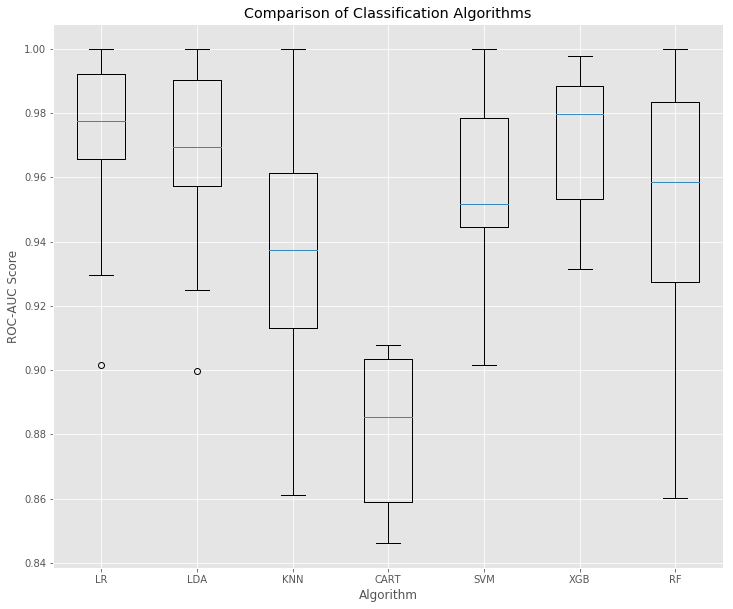

In [43]:
#Compare Algorithms

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

In [44]:
#visualizing RF
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png',width=500,height=500)